<a href="https://colab.research.google.com/github/sun-in-universe/blue_dot/blob/main/%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) #가장 자주 등장하는 단어 500개

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0]))

218


In [5]:
print(train_input[1])

[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2, 2, 5, 2, 4, 116, 9, 35, 2, 4, 229, 9, 340, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 2, 46, 37, 4, 455, 9, 45, 43, 38, 2, 2, 398, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 2, 7, 2, 2, 349, 2, 148, 2, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 2, 98, 5, 4, 228, 9, 43, 2, 2, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 2, 228, 2, 5, 2, 2, 245, 2, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 2, 14, 9, 6, 371, 78, 22, 2, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
#검증세트 떼어놓기

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [8]:
# 각 리뷰의 길이를 계산해 넘파이 배열에 담기 -> 평균적인 리뷰의 길이, 가장 짧은 길이의 리뷰의 길이, 가장 긴 리뷰의 길이 확인

import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


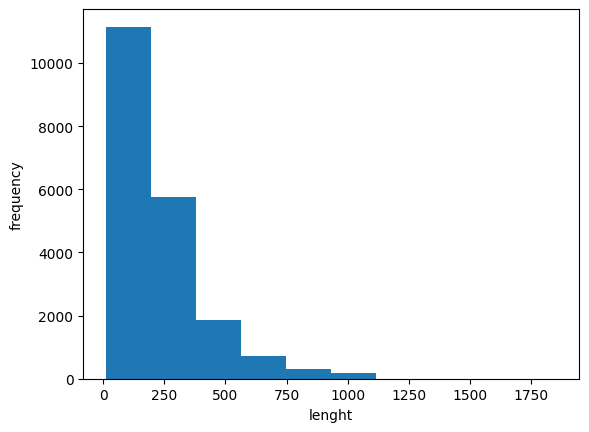

In [10]:
# lengths의 분포를 히스토그램에 표현해보기

import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lenght')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
# 파이썬 리스트 배열 -> (20000, 100)크기의 2차원 배열이 되었다.
print(train_seq.shape)

(20000, 100)


In [13]:
#기본적으로 앞부분을 패딩 0, 뒷부분이 중요한 정보라고 생각함. 뒷부분을 잘라내고 싶다면, truncating 매개변수 값을 pre가 아닌 post로 선정하면 됌
val_seq = pad_sequences(val_input, maxlen=100)

In [14]:
#순환 신경망 만들기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid')) #활성화함수로 시그모이드 함수를 사용

In [15]:
#케라스에서 제공하는 원핫 인코딩 유틸리티ㅣ to_categorical

train_oh = keras.utils.to_categorical(train_seq)

In [16]:
print(train_oh.shape)

(20000, 100, 500)


In [17]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [18]:
val_oh = keras.utils.to_categorical(val_seq)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


RMSprop은 경사 하강법의 변형 중 하나로, 신경망 학습에서 널리 사용되는 최적화 알고리즘 중 하나입니다. RMSprop은 "Root Mean Square Propagation"의 줄임말로, 기울기의 제곱의 이동 평균의 제곱근을 사용하여 학습 속도를 조절하는 방식으로 동작합니다.

Early Stopping은 모델의 과적합을 방지하고 효율적인 훈련을 위해 사용되는 유용한 방법 중 하나입니다. patience 값은 일반적으로 너무 작지 않게 설정하여 너무 빠른 중지를 방지하며, restore_best_weights를 True로 설정하면 최상의 성능을 달성했을 때의 모델을 유지할 수 있습니다.

'best-simplernn-model.h5': 이 부분은 모델 가중치를 저장할 파일의 이름입니다. 즉, 최상의 모델 가중치가 저장될 파일의 이름을 지정하는 부분입니다. ".h5" 확장자는 Keras에서 모델 아키텍처와 가중치를 저장하기 위해 사용되는 표준 파일 형식입니다.

save_best_only (인자: 불린) - 이 파라미터는 최상의 모델 가중치만 저장할지 여부를 결정합니다. 기본값은 False입니다. 만약 True로 설정하면, 콜백은 검증 손실을 모니터링하고 검증 손실이 개선될 때만 모델 가중치를 저장합니다. 이렇게 하면 학습 과정에서 검증 성능이 가장 좋을 때의 모델을 저장할 수 있습니다

In [ ]:
#RMSprop 객체 만들기

import keras
import keras.utils
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 58ms/step - loss: 0.7019 - accuracy: 0.4924 - val_loss: 0.6970 - val_accuracy: 0.5112
Epoch 2/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6953 - accuracy: 0.5094 - val_loss: 0.6937 - val_accuracy: 0.5222
Epoch 3/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6907 - accuracy: 0.5288 - val_loss: 0.6889 - val_accuracy: 0.5390
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6756 - accuracy: 0.5730 - val_loss: 0.6635 - val_accuracy: 0.6020
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6452 - accuracy: 0.6356 - val_loss: 0.6346 - val_accuracy: 0.6464
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6177 - accuracy: 0.6758 - val_loss: 0.6092 - val_accuracy: 0.6852
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5892 - accuracy: 0.7097 - val_loss: 0.5738 - val_ac

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()